In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow

img = cv.imread("Lab1.png")
rows, cols = img.shape[:2]

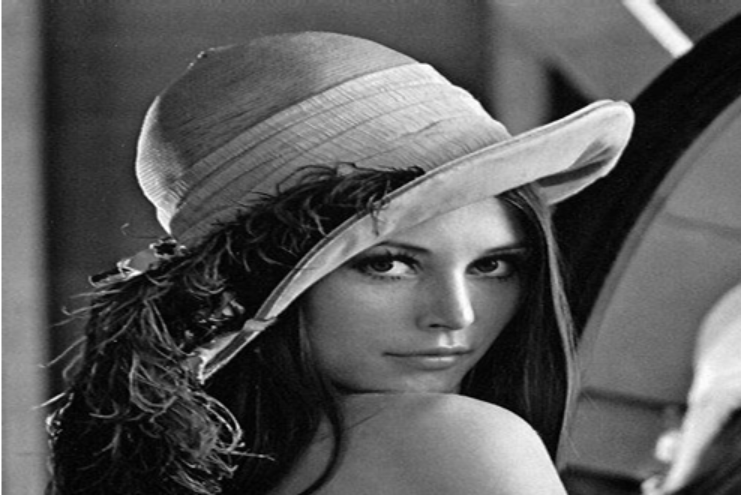

In [ ]:
#Task1

if img is None:
    print("Error: Image not found or unable to load.")
else:
    # Resize the image
    linear = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_LINEAR)

    # Display the image (without a title)
    cv2_imshow(linear)


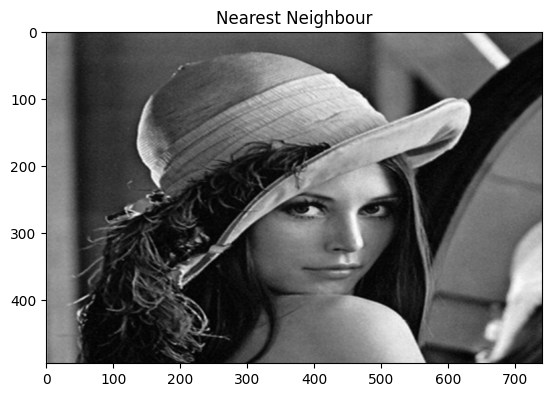

In [ ]:
nearest = cv.resize(img, None, fx=1.5, fy=1.5 , interpolation=cv.INTER_NEAREST)
plt.imshow(cv.cvtColor(linear, cv.COLOR_BGR2RGB)) #Convert to RGB
plt.title('Nearest Neighbour')
plt.show()

Polynomial Resizing:


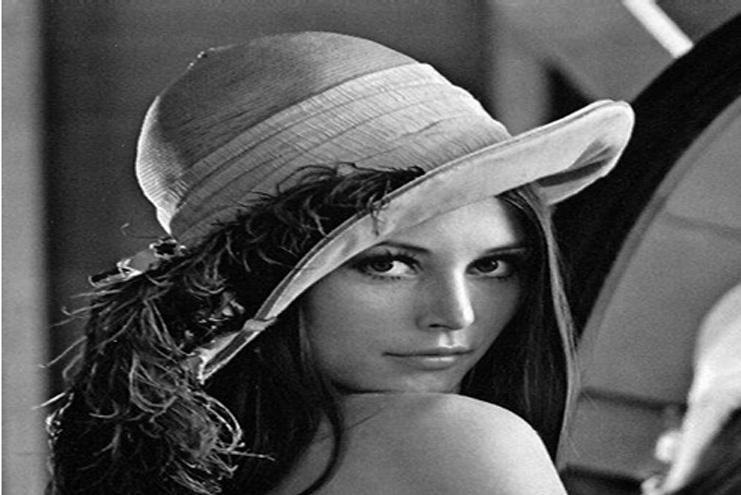

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# Load the image
img = cv.imread("Lab1.png")

# Check if the image is loaded properly
if img is None:
    print("Error: Image not found or unable to load.")
else:
    # Get image dimensions
    rows, cols, _ = img.shape

    # Apply a reasonable resize factor (avoid extreme values)
    fx, fy = 1.5, 1.5  # Scaling factor (adjust as needed)

    # Resize using cubic interpolation (polynomial method)
    polynomial = cv.resize(img, None, fx=fx, fy=fy, interpolation=cv.INTER_CUBIC)

    # Display the resized image
    print("Polynomial Resizing:")
    cv2_imshow(polynomial)  # Fixed


Box Blur:


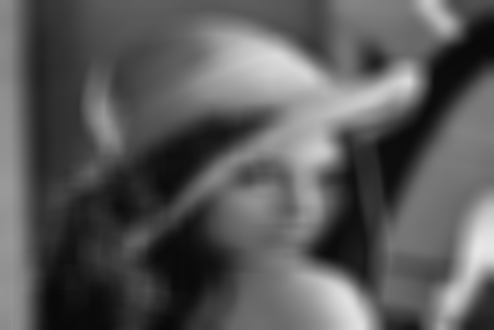

Gaussian Blur:


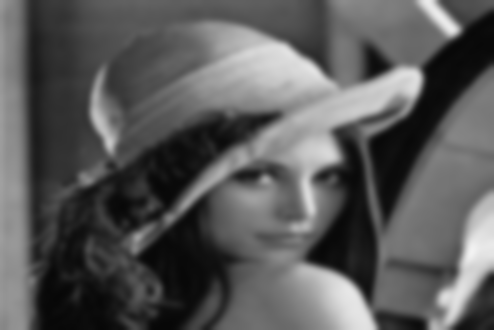

Adaptive Blur:


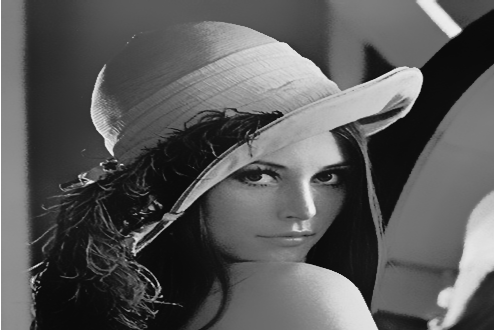

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# Load the image
img = cv.imread("Lab1.png")

# Box Blurring
box_blur = cv.blur(img, (25, 25))
print("Box Blur:")
cv2_imshow(box_blur)  # Fixed

# Gaussian Blurring
gaussian = cv.GaussianBlur(img, (19, 19), 0)
print("Gaussian Blur:")
cv2_imshow(gaussian)  # Fixed

# Adaptive (Bilateral) Blurring
adaptive = cv.bilateralFilter(img, d=59, sigmaColor=75, sigmaSpace=75)
print("Adaptive Blur:")
cv2_imshow(adaptive)  # Fixed



In [ ]:
#Task 2
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay, roc_auc_score

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype('int')
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target  # X: features, y: labels

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

# Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    print(f"\n Model: {name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Compute ROC-AUC only if the model supports probability outputs
    if y_proba is not None:
        auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr')
        print(f"ROC-AUC Score: {auc_score:.4f}")

# K-Fold Cross-Validation
rf_cv_scores = cross_val_score(models["Random Forest"], X, y, cv=5)
print("\n Random Forest Cross-Validation Accuracy:", rf_cv_scores.mean())



 Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.92      0.97      0.95        36
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       0.97      1.00      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

Confusion Matrix:
 [[35  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  1  0  0  0  0]
 [ 1  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0

In [ ]:
print("Model evaluation of random forest: ")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: ", precision)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: ", recall)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: ", f1)

Model evaluation of random forest: 
Accuracy: 0.9750
Precision:  0.9758870712818082
Recall:  0.975
F1 Score:  0.9749341232105315


In [ ]:
#print("Model evaluation of ANN: ")

#accuracy = accuracy_score(y_test, y_pred_ann)
#print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1-Score
#precision = precision_score(y_test, y_pred_ann, average='weighted')
#print("Precision: ", precision)
#recall = recall_score(y_test, y_pred_ann, average='weighted')
#print("Recall: ", recall)
#f1 = f1_score(y_test, y_pred_ann, average='weighted')
#print("F1 Score: ", f1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure y_test is a 1D array
y_test = np.argmax(y_test_oh, axis=1)

# Convert predicted probabilities to class labels
y_pred_ann = y_proba_ann.argmax(axis=1)

# Now, check the shape before evaluation
print(f"y_test shape: {y_test.shape}")  # Should match y_pred_ann.shape
print(f"y_pred_ann shape: {y_pred_ann.shape}")

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann, average='weighted')
recall = recall_score(y_test, y_pred_ann, average='weighted')
f1 = f1_score(y_test, y_pred_ann, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


y_test shape: (14000,)
y_pred_ann shape: (14000,)
Accuracy: 0.9796
Precision: 0.9797
Recall: 0.9796
F1 Score: 0.9796


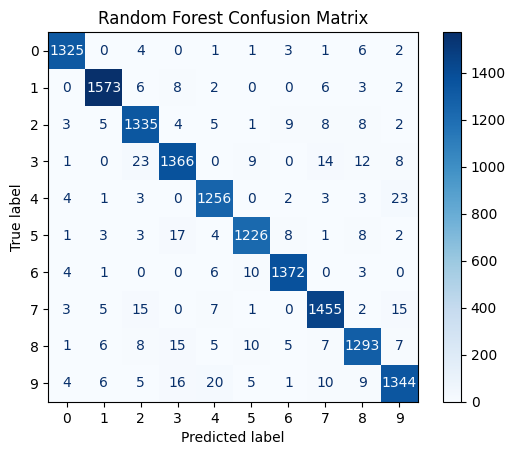

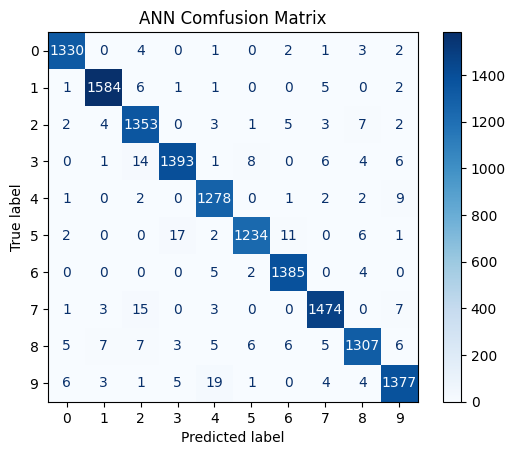

In [ ]:


# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_rf, display_labels=range(10)).plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

# ANN Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred=y_pred_ann)
ConfusionMatrixDisplay(cm_ann, display_labels=range(10)).plot(cmap="Blues")
plt.title("ANN Comfusion Matrix")
plt.show()


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


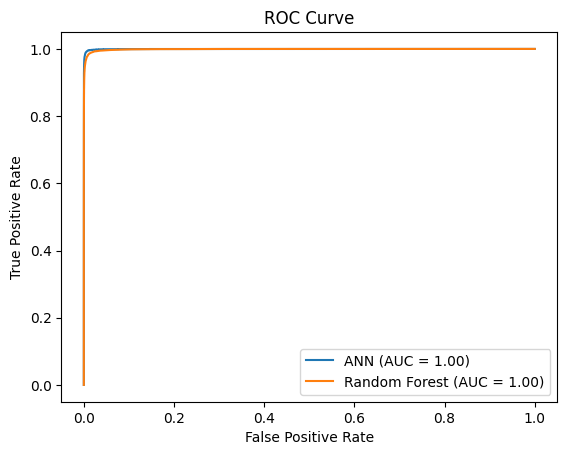

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Ensure correct y_test shape
y_test_bin = label_binarize(y_test, classes=range(10))

# Compute AUC for Random Forest (Ensure proper length)
y_proba_rf = rf_model.predict_proba(X_test)  # Ensure it's on the correct test set
roc_auc_rf = roc_auc_score(y_test_bin, y_proba_rf, multi_class='ovr')

# Compute AUC for ANN
y_proba_ann = ann_model.predict(X_test)  # Ensure it's on the correct test set
roc_auc_ann = roc_auc_score(y_test_bin, y_proba_ann, multi_class='ovr')

# Plot ROC Curve
fpr_ann, tpr_ann, _ = roc_curve(y_test_bin.ravel(), y_proba_ann.ravel())
plt.plot(fpr_ann, tpr_ann, label=f"ANN (AUC = {roc_auc_ann:.2f})")

fpr_rf, tpr_rf, _ = roc_curve(y_test_bin.ravel(), y_proba_rf.ravel())
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
